# 기말 발표 내용 

##  - 문제 소개 : 가장 많이 읽은 Category에 대한 나의 생각 및 관심사 확인하기

###  - 기획 의도 : 데이터 분석이라는 거창한 주제를 생활 속에서 시작하기.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt # plot 관련
import matplotlib.font_manager # font 관련
import seaborn as sns # plot 관련
from wordcloud import WordCloud
from konlpy.tag import Kkma # 단어 처리
from sklearn.feature_extraction.text import CountVectorizer
import operator
%matplotlib inline
matplotlib.style.use('ggplot')

In [218]:
def get_word(doc):
    '''길이가 2 이상인 단어 및 필요없는 단어 제거'''
    tagger = Twitter()
    nouns = tagger.nouns(doc)
    
    remove_noun = []
    with open('remove_noun.txt', 'r', newline='\r\n', encoding='utf8') as f:
        for line in f.readlines():
            remove_noun.append(line.strip())
            
    res = []
    for noun in nouns:
        if ((len(noun) > 1) & (noun not in remove_noun)) :
            res.append(noun)
    
    return res

In [3]:
book = pd.read_excel('book.xlsx', encoding = "utf-8") # 책 읽은 내역 데이터
book_times = pd.read_excel('book_times.xlsx') # 책 읽은 시간 내역

In [4]:
book.head()

,Title,Subtitle,Author,Translator,Publisher,Publish Date,Format,Pages,ISBN,Status,...,Started Reading,Finished Reading,Reading Period,Borrowed,Have Weekend,Reading Time,Read Reason,Found Route,Route Category,Text
0,프레임,나를 바꾸는 심리학의 지혜,최인철,NaN,21세기북스,NaN,eBook,188,9788950911546,Read,...,2015-12-30,2016-01-05,6,N,Y,0,지인추천,NaN,지인,건너뛰기 형태로 책을 읽은지 언 2년이 되가지만 이렇게 남기는건 처음이다. 기억도 ...
1,왜 나는 범죄를 공부하는가,최고의 프로파일러 표창원 박사의 두려움 없는 공부,표창원,NaN,다산북스,2015-03-17 00:00:00,eBook,229,9791130604909,Read,...,2016-01-05,2016-01-07,2,N,N,0,검색,정의의적들,TV프로그램,원래 추리와 범죄 관련에 관심이 많아서 항상 이사람에 대해서 관심은 가지고 있었다....
2,정의의 적들,"정의는 때로 천천히, 하지만 반드시 온다",표창원,NaN,한겨레출판,2014-05-19 00:00:00,eBook,312,8984318116,Read,...,2016-01-08,2016-01-11,3,N,Y,0,검색,정의의적들,TV프로그램,나는 왜 범죄를 공부하는가 다음에 읽은 표창원 교수의 책이다. 책 내용은 대한민국에...
3,"로봇 시대,인간의 일",인공지능 시대를 살아가야 할 이들을 위한 안내서,구본권,NaN,어크로스,2015-12-15 00:00:00,Paperback,342,9788997379767,Read,...,2016-01-12,2016-01-14,2,Y,N,0,지인추천,NaN,지인,"요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 ""이렇게 공유해..."
4,숨겨진 심리학,NaN,표창원,NaN,토네이도,2011-04-11 00:00:00,book,226,9788994013343,Read,...,2016-01-14,2016-01-18,4,Y,Y,0,검색,정의의적들,TV프로그램,글쓴이가 자신이 맡았던 수사과정에서 사람의 심리에 대해 어떤식으로 활용하면 범죄 자...


In [5]:
book_times.head()

,ISBN,Start Read Time,End Read Time,Read Place,Move Place,Not Read Reason,Weekend Yn,Start Page Num,End Page Num
0,9788947540674,2016-03-03 13:10:00,2016-03-03 13:43:00,버스,학교,NaN,1.0,1,38
1,9788947540674,2016-03-03 21:16:00,2016-03-03 22:13:00,버스,집,NaN,1.0,38,87
2,9788947540674,2016-03-04 14:10:00,2016-03-04 14:34:00,버스,학교,NaN,1.0,87,112
3,9788947540674,2016-03-04 18:50:00,2016-03-04 19:45:00,버스,집,NaN,1.0,112,153
4,9788947540674,2016-03-05 08:13:00,2016-03-05 08:53:00,버스,학교,NaN,1.0,153,187


##### 그래프에 한글출력을 위한 font 화인

In [6]:
print ([f.name for f in matplotlib.font_manager.fontManager.ttflist])  # 그래프에 한글 표시를 위한 코드

['Bitstream Vera Serif', 'STIXGeneral', 'STIXGeneral', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'cmex10', 'Bitstream Vera Sans Mono', 'STIXSizeOneSym', 'Bitstream Vera Sans', 'Bitstream Vera Serif', 'STIXSizeFiveSym', 'cmr10', 'STIXGeneral', 'Bitstream Vera Sans Mono', 'STIXSizeFourSym', 'Bitstream Vera Sans', 'STIXNonUnicode', 'cmmi10', 'cmb10', 'Bitstream Vera Sans Mono', 'STIXNonUnicode', 'Bitstream Vera Sans', 'cmss10', 'Bitstream Vera Sans Mono', 'cmtt10', 'Bitstream Vera Sans', 'cmsy10', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'Vivaldi', 'ParkAvenue BT', 'Garamond', 'Traditional Arabic', 'Yj TEUNTEUN Bold', 'Haan Cooljazz M', 'Comic Sans MS', 'Century Schoolbook', 'Trebuchet MS', 'EucrosiaUPC', 'Microsoft New Tai Lue', 'Calibri', '??????', 'EucrosiaUPC', 'HYsupB', 'Aparajita', 'SimSun-ExtB', 'Angsana New', 'JasmineUPC', 'Elephant', 'Stencil', 'Haan YHead B', 'Arabic Typesetting', 'Brush Script MT',

In [7]:
matplotlib.rc('font', family='HCR Dotum') # font 지정

##### 월별 읽은 책 수 확인

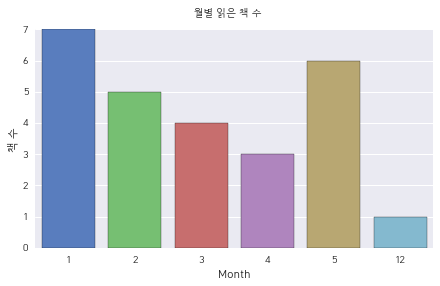

In [9]:
book['Month'] = book['Started Reading'].dt.month
Month_g = sns.factorplot('Month', kind='count', data=book, aspect=1.5, palette = 'muted')
Month_g.fig.suptitle("월별 읽은 책 수")
Month_g.set_ylabels("책 수")
Month_g.fig.subplots_adjust(top=.9)

##### 카테고리별 읽은 책 수 확인

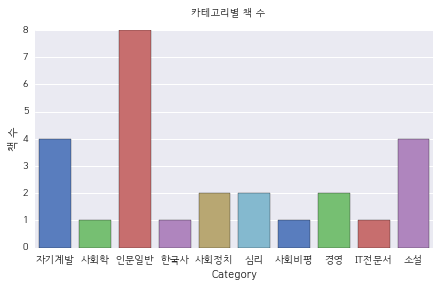

In [8]:
cate_g = sns.factorplot('Category', kind = 'count', data=book,aspect=1.5, palette="muted") # aspect : 축을 늘려줌, palette : 색지정
cate_g.fig.suptitle("카테고리별 책 수")
cate_g.set_ylabels("책 수")
cate_g.fig.subplots_adjust(top=.9)

##### 인문일반을 가장 많이 읽었으므로, 인문일반의 데이터만 뽑기

In [10]:
book_general = book[book.Category == "인문일반"]

In [13]:
book_general

,Title,Subtitle,Author,Translator,Publisher,Publish Date,Format,Pages,ISBN,Status,...,Finished Reading,Reading Period,Borrowed,Have Weekend,Reading Time,Read Reason,Found Route,Route Category,Text,Month
3,"로봇 시대,인간의 일",인공지능 시대를 살아가야 할 이들을 위한 안내서,구본권,NaN,어크로스,2015-12-15 00:00:00,Paperback,342,9788997379767,Read,...,2016-01-14,2,Y,N,0,지인추천,NaN,지인,"요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 ""이렇게 공유해...",1
5,사피엔스,"유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문",유발 하라리,조현욱,김영사,2015-11-24 00:00:00,book,586,8934972726,Read,...,2016-01-23,5,Y,Y,0,지인추천,NaN,지인,아 모르겠다 한번더 읽어봐야 알 거 같다.,1
11,어떻게 읽을 것인가,NaN,고영성,NaN,스마트북스,2015-12-28 00:00:00,book,302,9791185541303,Read,...,2016-02-20,2,Y,Y,0,지인추천,NaN,지인,지인이 추천한 책이다. 독서 허접인 나에게 딱 맞는 책이라 생각한다. 그 맞는 책이...,2
15,시민의교양,NaN,채사장,NaN,웨일북,2016-01-07 00:00:00,eBook,348,9791195677108,Read,...,2016-03-27,6,N,Y,336,검색,서점,오프라인검색,책울 손에 놓지 않기 위해 서점에서 찾다가 발견한 책이다. 일단 저자 이름이 특이해...,3
16,"지적 대화를 위한 넓고 얕은 지식(역사,경제,정치,사회,윤리)",NaN,채사장,NaN,NaN,2015-02-04 00:00:00,eBook,327,9788994120966,Read,...,2016-04-03,6,N,Y,228,검색,시민의교양,표지,시민의 교양을 읽으며 유명하다고 해서 읽은 책이다. 본래는 이 책을 읽고 시민의 교...,3
17,지적 대화를 위한 넓고 얕은 지식: 현실너머 편,NaN,채사장,NaN,NaN,2015-02-04 00:00:00,eBook,338,9788994120997,Read,...,2016-04-09,5,N,Y,293,검색,시민의교양,표지,지대넓얕의 현실 세계 너머 편이다. 1권은 아무래도 귓동냥으로 들은게 있어서 인지 ...,4
20,김대식의 빅퀘스천,NaN,김대식,NaN,NaN,2014-12-03 00:00:00,book,320,9788962620887,Read,...,2016-05-04,2,Y,N,154,지인추천,NaN,지인,철학 같이 생각이 많은 책이 힘들다는 말에 지인이 추천해준 책이다. 이름부터 빅퀘스...,5
25,"천재의 두 얼굴, 사이코패스",NaN,케빈 더튼,NaN,미래의 창,2013-05-20 00:00:00,eBook,287,9788959892235,Read,...,2016-05-31,4,N,Y,201,검색,리디북스,인터넷,또라이들의 시대를 읽은 후 특이한 것에 끌려 검색하다가 찾은 책이다. 이 책은 사이...,5


##### 내가 읽은 인문일반 책들 확인

In [97]:
book_general[['Title', 'Text'] ]

,Title,Text
3,"로봇 시대,인간의 일","요즘은 참 지인 추천으로 읽는 책이 많다. 반성도 되면서 한편으로는 ""이렇게 공유해..."
5,사피엔스,아 모르겠다 한번더 읽어봐야 알 거 같다.
11,어떻게 읽을 것인가,지인이 추천한 책이다. 독서 허접인 나에게 딱 맞는 책이라 생각한다. 그 맞는 책이...
15,시민의교양,책울 손에 놓지 않기 위해 서점에서 찾다가 발견한 책이다. 일단 저자 이름이 특이해...
16,"지적 대화를 위한 넓고 얕은 지식(역사,경제,정치,사회,윤리)",시민의 교양을 읽으며 유명하다고 해서 읽은 책이다. 본래는 이 책을 읽고 시민의 교...
17,지적 대화를 위한 넓고 얕은 지식: 현실너머 편,지대넓얕의 현실 세계 너머 편이다. 1권은 아무래도 귓동냥으로 들은게 있어서 인지 ...
20,김대식의 빅퀘스천,철학 같이 생각이 많은 책이 힘들다는 말에 지인이 추천해준 책이다. 이름부터 빅퀘스...
25,"천재의 두 얼굴, 사이코패스",또라이들의 시대를 읽은 후 특이한 것에 끌려 검색하다가 찾은 책이다. 이 책은 사이...


### 위의 책들에 대한 나의 생각 및 관심사 확인
##### - 가지고 있는 텍스트에서 단어 뽑기 위해 list로 변환

In [168]:
general_text = book_general.Text.tolist() # list 변환

##### konlpy의 Kkma() 를 이용한 단어 및 단어당 횟수 뽑기
#####  -관련링크 :  http://konlpy.org/ko/v0.4.3/api/konlpy.tag/

In [205]:
tagger = Kkma()
cv = CountVectorizer(tokenizer=get_word, max_features=50) # 50개의 단어 추출
tdf = cv.fit_transform(general_text) 
words = cv.get_feature_names()
print (words)
    
count_mat = tdf.sum(axis=0) # 열별로 단어별 출현 빈도 합계 구함(axis = 1 , 각 문서별 명사의 사용 개수)
count = np.squeeze(np.asarray(count_mat)) # 대괄호가 하나로 줄어듬. 좀더 데이터 핸들링을 쉽게 하기 위해 리스트 형태로 해줌
print (count)

['감정', '개념', '개입', '경우', '경제', '과학', '관점', '교양', '교육', '국가', '기능', '기억', '노동자', '러닝', '로봇', '마지막', '문제', '미래', '배분', '사이코패스', '사회', '세계', '세금', '손해', '시대', '시민', '어찌', '언급', '엄독', '역사', '윤리', '이득', '이유', '임금', '자본가', '자본주의', '자신', '자유', '잡스', '재독', '재미', '정부', '정의', '정치', '주제', '직업', '진리', '질병', '철학', '현실']
[ 3  6  2  2  9  2  6  3  3  4  2  2  4  2  2  2  2  2  2 13  6  3  7  3  5
  3  1  1  1  2  4  3  2  2  2  2  2  5  1  1  1  2  5  2 10  2  6  2  2  5]


##### dataframe 만드는 과정

In [206]:
word_data = {'word' : words, 'count' : count}

In [208]:
word_df = DataFrame(word_data, columns =['word', 'count'] )

In [209]:
word_df

,word,count
0,감정,3
1,개념,6
2,개입,2
3,경우,2
4,경제,9
5,과학,2
6,관점,6
7,교양,3
8,교육,3
9,국가,4


##### 단어별 빈도수를 나타내기 위한 groupby
##### word 별로 groupby 후 count로 aggregate

In [210]:
group_word = word_df.groupby('word').agg({'count': sum})

In [211]:
group_word = group_word.sort_values(['count'], ascending=[0])

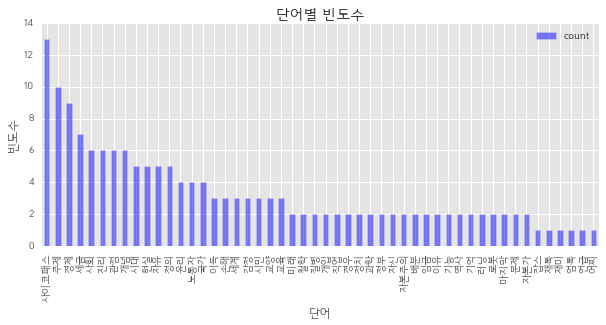

In [212]:
group_word.plot(kind="bar", alpha=0.5, rot=90, figsize=(10, 4), color = "blue")
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.title("단어별 빈도수")
plt.show()

##### wordcloud 나타내기

In [213]:
word_count = list(zip(words, count))

In [214]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('사이코패스', 13),
 ('주제', 10),
 ('경제', 9),
 ('세금', 7),
 ('개념', 6),
 ('관점', 6),
 ('사회', 6),
 ('진리', 6),
 ('시대', 5),
 ('자유', 5),
 ('정의', 5),
 ('현실', 5),
 ('국가', 4),
 ('노동자', 4),
 ('윤리', 4),
 ('감정', 3),
 ('교양', 3),
 ('교육', 3),
 ('세계', 3),
 ('손해', 3),
 ('시민', 3),
 ('이득', 3),
 ('개입', 2),
 ('경우', 2),
 ('과학', 2),
 ('기능', 2),
 ('기억', 2),
 ('러닝', 2),
 ('로봇', 2),
 ('마지막', 2),
 ('문제', 2),
 ('미래', 2),
 ('배분', 2),
 ('역사', 2),
 ('이유', 2),
 ('임금', 2),
 ('자본가', 2),
 ('자본주의', 2),
 ('자신', 2),
 ('정부', 2),
 ('정치', 2),
 ('직업', 2),
 ('질병', 2),
 ('철학', 2),
 ('어찌', 1),
 ('언급', 1),
 ('엄독', 1),
 ('잡스', 1),
 ('재독', 1),
 ('재미', 1)]

In [215]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

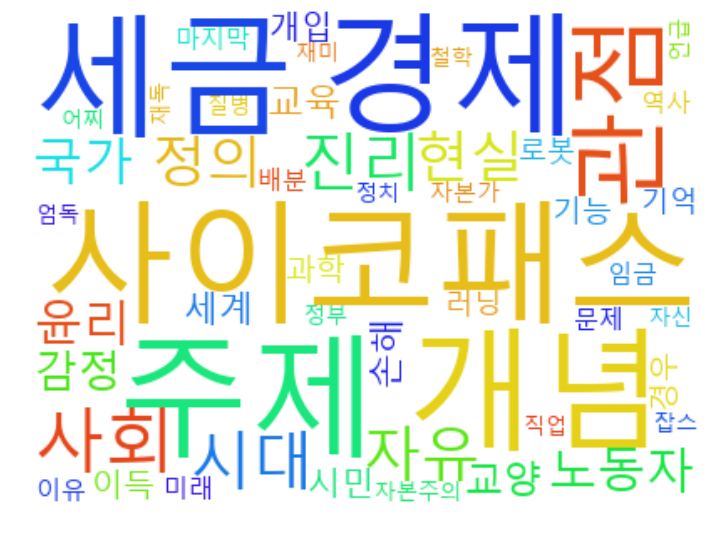

In [216]:
plt.figure(figsize=(12, 9))
plt.imshow(cloud)
plt.axis("off")
plt.show()